# Problem Definition

**Tags:** `statistics`, `probability theory`, `decision theory`, `expected value`, `optimization`, `dice`, `stochastic processes`

Consider a standard fair six-sided die with outcomes `{1, 2, 3, 4, 5, 6}`. You are allowed **at most two rolls**. After the first roll, you may either **accept the outcome** or **reroll once** and accept the second outcome. The objective is to determine a strategy that **maximizes the expected value** of the result obtained.

## Formal Description

1. Let `X₁` be the result of the first roll.
2. Let `X₂` be the result of the second roll (if chosen).
3. Define a decision rule `f(X₁) ∈ {accept, reroll}`.
4. The goal is to choose `f` to maximize `E[final outcome]`.

# Solution

In [1]:
# import libraries

import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)
import numpy as np
from matplotlib.patches import Patch
import matplotlib.pyplot as plt
import seaborn as sns

## Reasoning. Common sense logic

Since we are dealing with a fair six-sided die, each outcome is equally likely with probability $$ 1/6 $$

Therefore, the expected value is

$$
E(X) \;=\; \frac{1}{6}\cdot1 + \frac{1}{6}\cdot2 + \frac{1}{6}\cdot3 + \frac{1}{6}\cdot4 + \frac{1}{6}\cdot5 + \frac{1}{6}\cdot6
\;=\; \frac{1}{6}(1+2+3+4+5+6)
\;=\; \frac{21}{6} \;=\; 3.5
$$


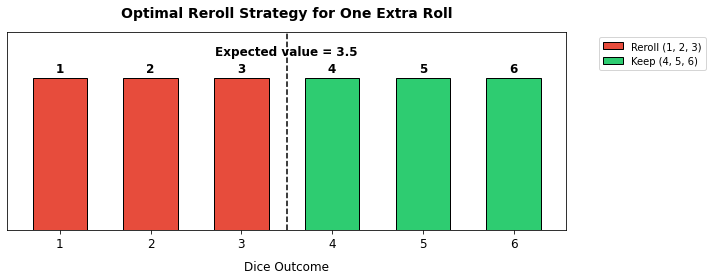

In [2]:
# values on the die
values = [1, 2, 3, 4, 5, 6]

# colors: red for reroll, green for keep
colors = ['#e74c3c' if v < 3.5 else '#2ecc71' for v in values]

plt.figure(figsize=(10, 4))
bars = plt.bar(values, [1]*6, color=colors, edgecolor='black', width=0.6)

# add value labels on top of bars
for bar, val in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width()/2, 1.02, str(val),
             ha='center', va='bottom', fontsize=12, fontweight='bold')

# add vertical line for expected value
plt.axvline(3.5, color='black', linestyle='--', linewidth=1.5)
plt.text(3.5, 1.15, 'Expected value = 3.5', ha='center', fontsize=12, fontweight='bold')

# styling
plt.xticks(values, fontsize=12)
plt.yticks([])
plt.ylim(0, 1.3)
plt.title("Optimal Reroll Strategy for One Extra Roll", fontsize=14, fontweight='bold', pad=15)
plt.xlabel("Dice Outcome", fontsize=12, labelpad=10)

# custom legend (placed outside the chart)
legend_elements = [
    Patch(facecolor='#e74c3c', edgecolor='black', label='Reroll (1, 2, 3)'),
    Patch(facecolor='#2ecc71', edgecolor='black', label='Keep (4, 5, 6)')
]
plt.legend(handles=legend_elements, bbox_to_anchor=(1.05, 1), loc='upper left',
           fontsize=10, frameon=True)

plt.tight_layout()
plt.show()

Even based on common sense, we can guess the following strategy:  

- If the first roll gives **1, 2, or 3**, we should roll the die again (use the two-roll strategy).  
- If the first roll gives **4, 5, or 6**, we should keep the result and avoid the second roll.

But why is this the case? Let's calculate expected value for the 2nd strategy

## Calculate Expected Value

Let’s verify that this strategy actually works:

**Case 1: First roll 1, 2, 3 → reroll**  
Expected value:  
$$
E_{\text{low}} = 3.5 \quad \text{(from the reroll)}
$$

**Case 2: First roll 4, 5, 6 → keep**  
Expected value:  
$$
E_{\text{high}} = \frac{4 + 5 + 6}{3} = 5
$$

**Overall expected value of the strategy:**  
$$
EV = P(\text{low}) \cdot E_{\text{low}} + P(\text{high}) \cdot E_{\text{high}}
$$

$$
EV = \frac{3}{6} \cdot 3.5 + \frac{3}{6} \cdot 5
= 0.5 \cdot 3.5 + 0.5 \cdot 5
= 1.75 + 2.5
= 4.25
$$

✅ So the expected outcome using this strategy is **4.25**, which is higher than the expected value of a single roll (3.5).

**Note on the uplift:**  
The increase from 3.5 to 4.25 happened because we replaced outcomes 1, 2, 3 with the expected value of a reroll (3.5). This adjustment improves the overall expected value.

**The following bar chart compares the expected value if we always accept the first roll versus applying the optimal strategy**

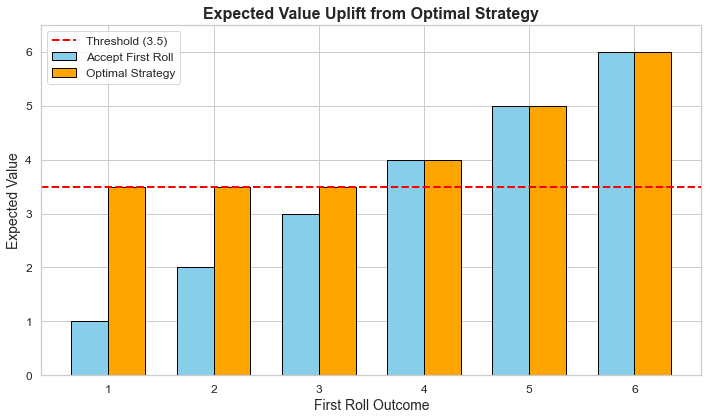

In [3]:
# Use Seaborn style for aesthetics
sns.set(style='whitegrid', palette='pastel')

# Outcomes of the die
outcomes = [1, 2, 3, 4, 5, 6]

# Expected value if we accept the first roll
accept_first = outcomes

# Expected value if we apply the strategy (reroll below 3.5, keep above)
strategy = [3.5 if x <= 3 else x for x in outcomes]

# Plotting
plt.figure(figsize=(10,6))
bar_width = 0.35
indices = range(len(outcomes))

# Bars with slight offset for clarity
plt.bar([i - bar_width/2 for i in indices], accept_first, width=bar_width, color='skyblue', edgecolor='black', label='Accept First Roll')
plt.bar([i + bar_width/2 for i in indices], strategy, width=bar_width, color='orange', edgecolor='black', label='Optimal Strategy')

# Highlight threshold
plt.axhline(y=3.5, color='red', linestyle='--', linewidth=2, label='Threshold (3.5)')

# Labels, title, and ticks
plt.title('Expected Value Uplift from Optimal Strategy', fontsize=16, fontweight='bold')
plt.xlabel('First Roll Outcome', fontsize=14)
plt.ylabel('Expected Value', fontsize=14)
plt.xticks(indices, [str(x) for x in outcomes], fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(0, 6.5)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()


## Simulation

**We first explore how the expected value of the dice game changes depending on the reroll threshold. This chart helps visualize both the theoretical expectation and how simulation results converge to it as the number of trials increases.**

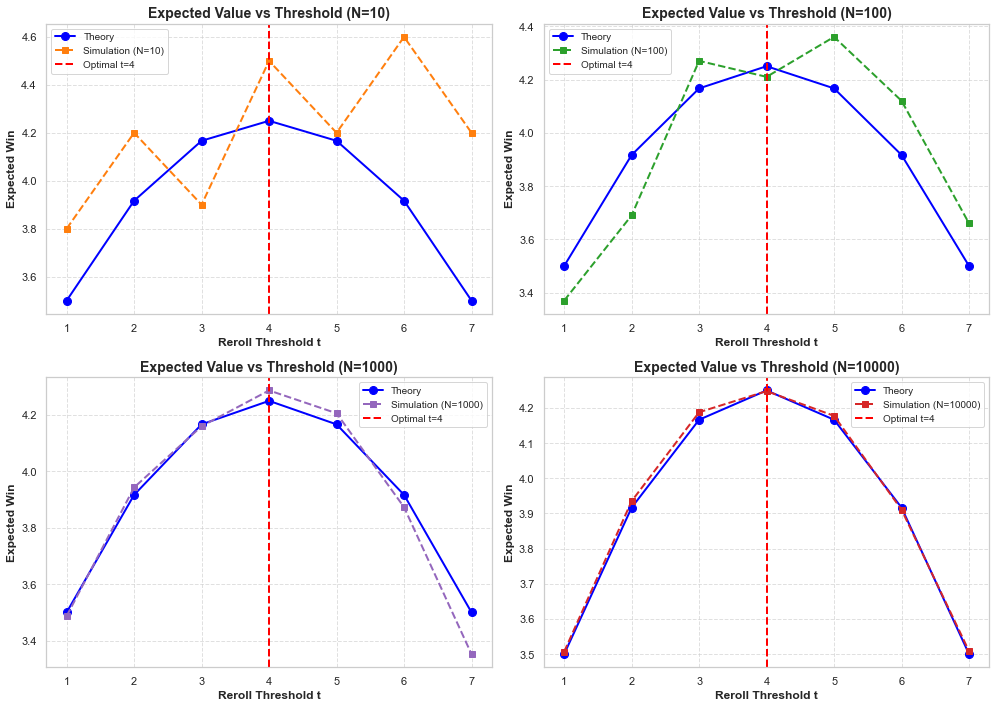

In [4]:
np.random.seed(42)  # Fix random seed for reproducibility

faces = np.arange(1, 7)
mean_roll = np.mean(faces)

# Function to simulate the dice game
def simulate_game(t, trials):
    results = []
    for _ in range(trials):
        first = np.random.randint(1, 7)
        if first < t:
            second = np.random.randint(1, 7)
            results.append(second)
        else:
            results.append(first)
    return np.mean(results)

# Function to calculate theoretical expected value
def expected_value(t):
    low_part = (t - 1) * mean_roll if t > 1 else 0
    high_part = np.sum(faces[faces >= t]) if t <= 6 else 0
    return (low_part + high_part) / 6

thresholds = np.arange(1, 8)
theoretical_E = [expected_value(t) for t in thresholds]

trial_counts = [10, 100, 1000, 10000]
opt_t = thresholds[np.argmax(theoretical_E)]

# Set up 2x2 subplot grid
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()  # Flatten axes for easy iteration

# Colors for simulation lines
sim_colors = ['#FF7F0E', '#2CA02C', '#9467BD', '#D62728']

for ax, N, color in zip(axes, trial_counts, sim_colors):
    simulated_E = [simulate_game(t, N) for t in thresholds]
    
    # Plot theoretical line
    ax.plot(thresholds, theoretical_E, marker='o', color='blue', linestyle='-', linewidth=2, markersize=8, label='Theory')
    
    # Plot simulation line
    ax.plot(thresholds, simulated_E, marker='s', linestyle='--', linewidth=2, markersize=6, color=color, label=f'Simulation (N={N})')
    
    # Plot optimal threshold
    ax.axvline(opt_t, color='red', linestyle='--', linewidth=2, label=f'Optimal t={opt_t}')
    
    # Customize axes
    ax.set_title(f'Expected Value vs Threshold (N={N})', fontsize=14, fontweight='bold')
    ax.set_xlabel('Reroll Threshold t', fontsize=12, fontweight='bold')
    ax.set_ylabel('Expected Win', fontsize=12, fontweight='bold')
    ax.set_xticks(thresholds)
    ax.grid(True, linestyle='--', alpha=0.6)
    ax.legend(fontsize=10)

plt.tight_layout()
plt.show()


**Sometimes in the first roll, you might get a number like 3, and after choosing to reroll, you could end up with a worse number like 1 or 2. At first, this might feel like the strategy backfired. However, this is where the concept of the law of large numbers comes into play. In the long run, rerolling low numbers is a winning strategy because it maximizes the expected value over many trials. Let's simulate this to see it in action.**

In [5]:
np.random.seed(42)

trial_counts = [10, 100, 1000, 10000]

def reroll_outcome_distribution_three(trials):
    # Counters for first roll 1,2,3
    results = {1: {'is_less': 0, 'is_equal': 0, 'is_greater': 0},
               2: {'is_less': 0, 'is_equal': 0, 'is_greater': 0},
               3: {'is_less': 0, 'is_equal': 0, 'is_greater': 0}}
    
    for _ in range(trials):
        first = np.random.randint(1, 4)  # only reroll if first ≤ 3
        second = np.random.randint(1, 7)
        if second < first:
            results[first]['is_less'] += 1
        elif second == first:
            results[first]['is_equal'] += 1
        else:
            results[first]['is_greater'] += 1
    
    # Calculate percentages
    percentages = {}
    for first_val, counts in results.items():
        total = counts['is_less'] + counts['is_equal'] + counts['is_greater']
        percentages[first_val] = {
            'is_less': counts['is_less']/total*100,
            'is_equal': counts['is_equal']/total*100,
            'is_greater': counts['is_greater']/total*100
        }
    return percentages

# Run simulation and print results
for N in trial_counts:
    pct = reroll_outcome_distribution_three(N)
    print(f"Trials: {N}")
    for first_val in [1,2,3]:
        print(f"  First roll = {first_val}:")
        print(f"    Second roll is less than first roll: {pct[first_val]['is_less']:.2f}%")
        print(f"    Second roll is equal to first roll: {pct[first_val]['is_equal']:.2f}%")
        print(f"    Second roll is greater than first roll: {pct[first_val]['is_greater']:.2f}%")
    print("-"*50)


Trials: 10
  First roll = 1:
    Second roll is less than first roll: 0.00%
    Second roll is equal to first roll: 0.00%
    Second roll is greater than first roll: 100.00%
  First roll = 2:
    Second roll is less than first roll: 0.00%
    Second roll is equal to first roll: 0.00%
    Second roll is greater than first roll: 100.00%
  First roll = 3:
    Second roll is less than first roll: 20.00%
    Second roll is equal to first roll: 20.00%
    Second roll is greater than first roll: 60.00%
--------------------------------------------------
Trials: 100
  First roll = 1:
    Second roll is less than first roll: 0.00%
    Second roll is equal to first roll: 19.44%
    Second roll is greater than first roll: 80.56%
  First roll = 2:
    Second roll is less than first roll: 19.35%
    Second roll is equal to first roll: 12.90%
    Second roll is greater than first roll: 67.74%
  First roll = 3:
    Second roll is less than first roll: 36.36%
    Second roll is equal to first roll: 18.

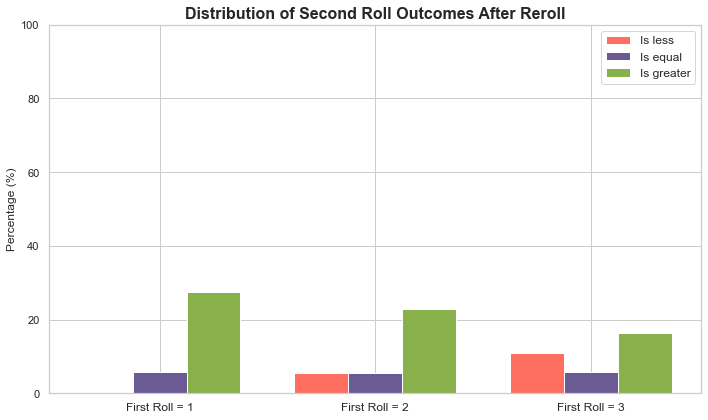

In [6]:
np.random.seed(42)

trial_count = 10000
threshold = 3.5

# Simulate outcomes
results = {1: {'is_less': 0, 'is_equal': 0, 'is_greater': 0},
           2: {'is_less': 0, 'is_equal': 0, 'is_greater': 0},
           3: {'is_less': 0, 'is_equal': 0, 'is_greater': 0}}

for _ in range(trial_count):
    first = np.random.randint(1, 4)  # reroll if first <= 3
    second = np.random.randint(1, 7)
    if second < first:
        results[first]['is_less'] += 1
    elif second == first:
        results[first]['is_equal'] += 1
    else:
        results[first]['is_greater'] += 1

# Convert to percentages
percentages = {first: {k: v/trial_count*100 for k,v in counts.items()} for first, counts in results.items()}

# Prepare data for plotting
categories = ['is_less', 'is_equal', 'is_greater']
data = np.array([[percentages[first][cat] for cat in categories] for first in [1,2,3]])
labels = ['First Roll = 1', 'First Roll = 2', 'First Roll = 3']

# Plotting
sns.set(style='whitegrid')
fig, ax = plt.subplots(figsize=(10,6))
bar_width = 0.25
indices = np.arange(len(labels))

# Plot each category
colors = ['#FF6F61', '#6B5B95', '#88B04B']
for i, cat in enumerate(categories):
    ax.bar(indices + i*bar_width, data[:, i], width=bar_width, color=colors[i], label=cat.replace('_', ' ').capitalize())

# Labels and aesthetics
ax.set_xticks(indices + bar_width)
ax.set_xticklabels(labels, fontsize=12)
ax.set_ylabel('Percentage (%)', fontsize=12)
ax.set_title('Distribution of Second Roll Outcomes After Reroll', fontsize=16, fontweight='bold')
ax.legend(fontsize=12)
plt.ylim(0, 100)
plt.tight_layout()
plt.show()


## Outcomes

# Key Takeaways

1. **Optimal strategy:** Reroll if the first roll is ≤ 3; otherwise, keep the first roll.
2. **Expected value improvement:** Even if a reroll sometimes results in a worse number, the long-term expected value increases (EV = 4.25 > 3.5).
3. **Probabilities for second roll outcomes after reroll:**
   - **First roll = 1:** Mostly better outcomes.
   - **First roll = 2:** More likely better, with a small chance of equal or worse outcomes.
   - **First roll = 3:** Roughly equal chances for worse, equal, or better outcomes.
4. **Law of large numbers:** Ensures the reroll strategy outperforms always keeping the first roll over many trials.
5. **Visualization support:** Charts confirm both the expected value uplift and the distribution of second roll outcomes.
